In [1]:
import numpy as np
import tifffile as tiff

# Load the two TIFF images
merged = tiff.imread("../outs/merged_ill.tif")


StackViewNDArray([[16, 18, 16, ..., 16, 17, 18],
                  [17, 18, 16, ..., 18, 17, 19],
                  [18, 17, 17, ..., 18, 19, 17],
                  ...,
                  [17, 18, 18, ..., 18, 17, 17],
                  [17, 18, 16, ..., 18, 18, 18],
                  [18, 17, 17, ..., 17, 17, 17]],
                 shape=(1200, 1920), dtype=uint8)
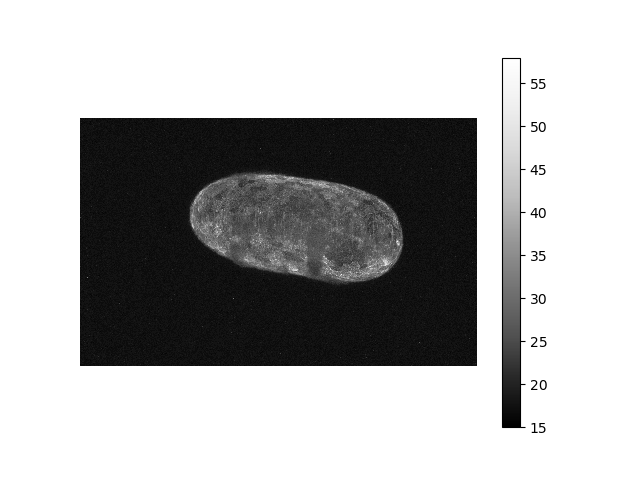
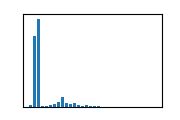

In [2]:
import stackview

max_proj = np.max(merged, axis=0)
stackview.insight(max_proj)

StackViewNDArray([[17, 17, 17, ..., 17, 17, 18],
                  [17, 17, 17, ..., 17, 17, 18],
                  [17, 17, 17, ..., 17, 17, 18],
                  ...,
                  [18, 18, 17, ..., 17, 17, 17],
                  [18, 18, 17, ..., 17, 17, 17],
                  [18, 18, 17, ..., 17, 17, 17]],
                 shape=(1200, 1920), dtype=uint8)
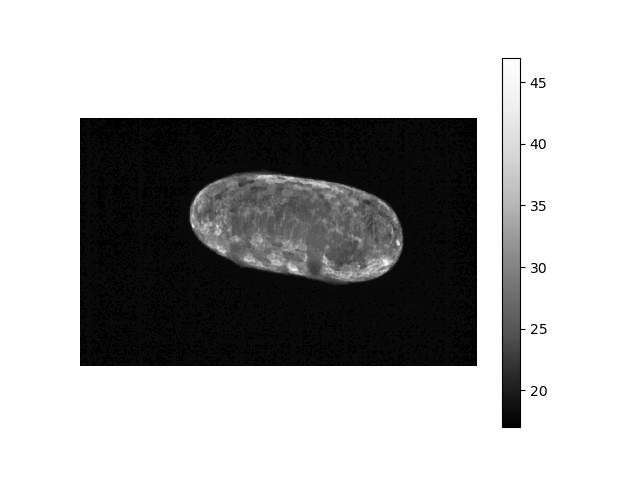
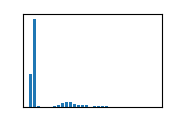

In [9]:
from skimage import data
from skimage import filters
from skimage import morphology

img_median = filters.median(max_proj, morphology.disk(5)) # TODO: need to replace with something based on pixel size in um
stackview.insight(img_median)

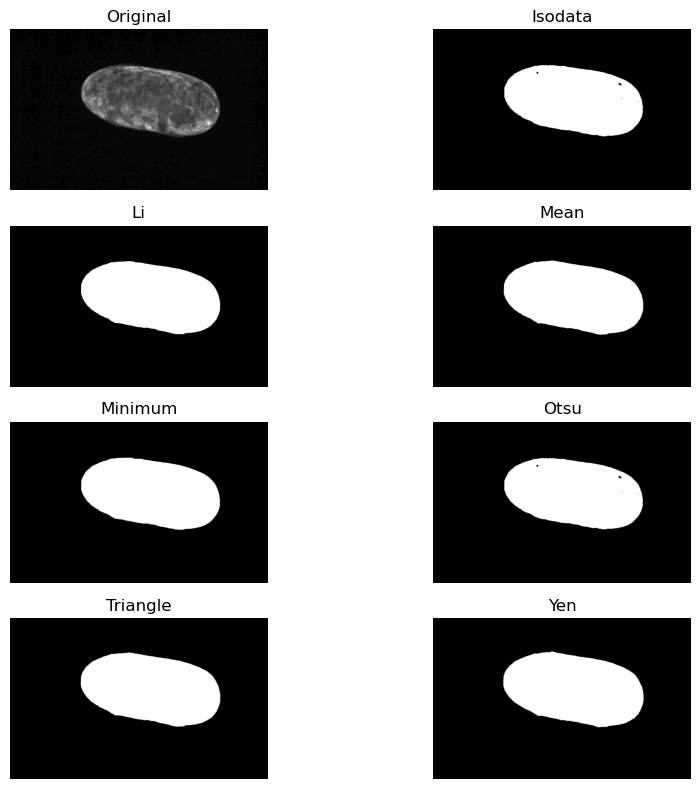

In [10]:
from matplotlib import pyplot as plt

fig, ax = filters.try_all_threshold(img_median, figsize=(10, 8), verbose=False)
plt.show()

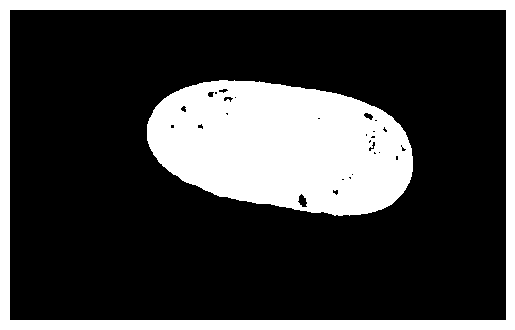

In [16]:
import napari_simpleitk_image_processing as nsitk

mask3 = nsitk.threshold_otsu(img_median)
stackview.imshow(mask3)

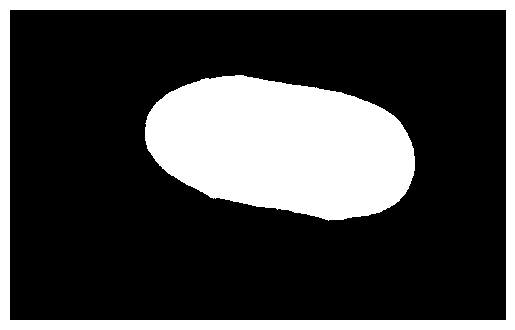

In [19]:
th = filters.threshold_triangle(img_median)
mask = img_median >= th
stackview.imshow(mask)

threshold_huang


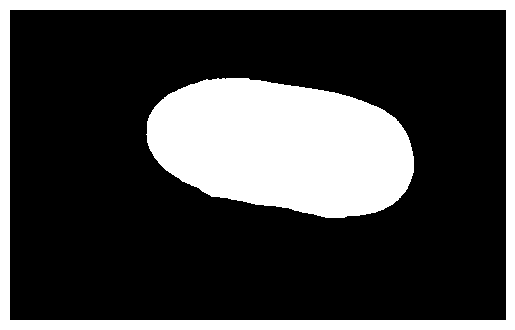

threshold_intermodes


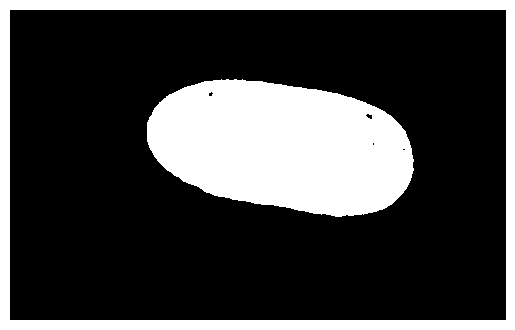

threshold_isodata


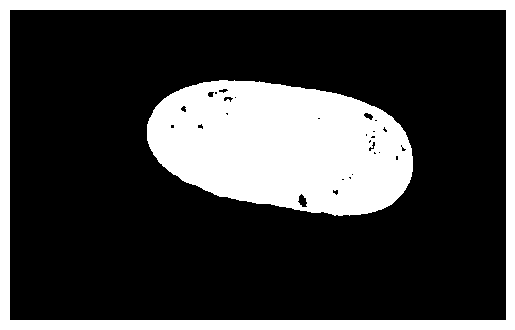

threshold_kittler_illingworth


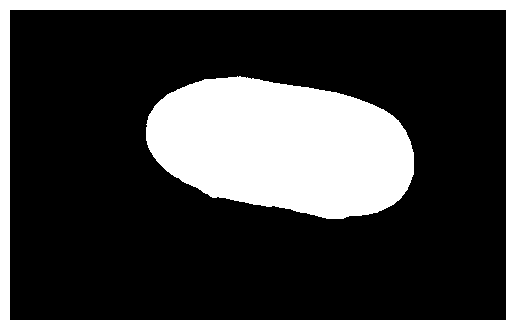

threshold_li


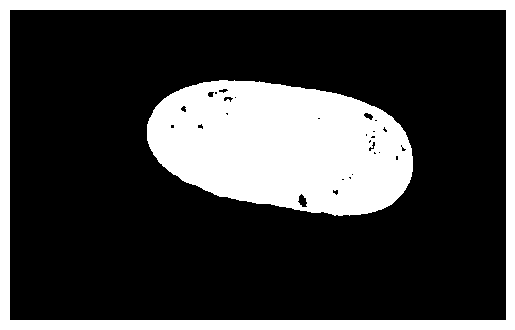

threshold_maximum_entropy


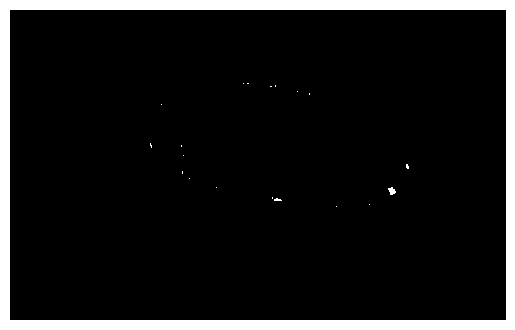

threshold_moments


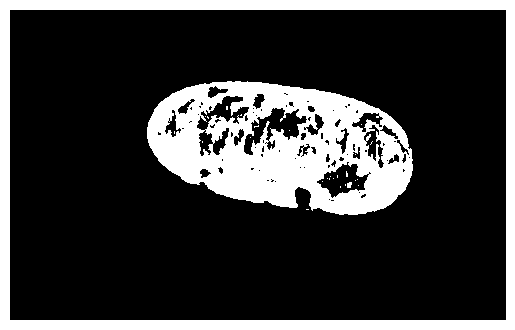

threshold_otsu


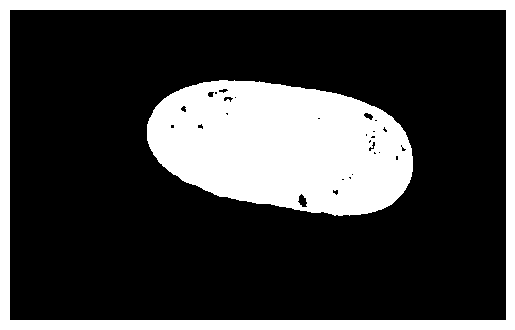

threshold_renyi_entropy


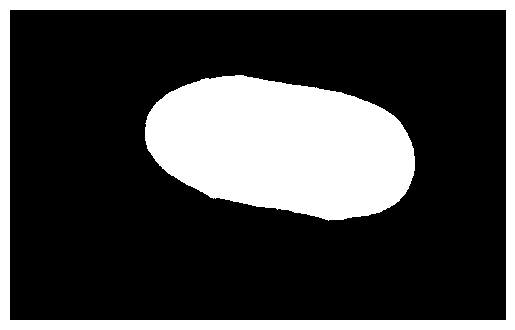

threshold_shanbhag


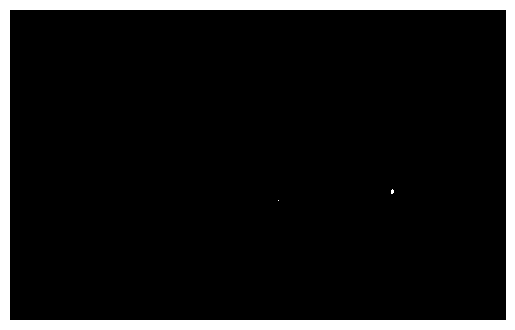

threshold_triangle


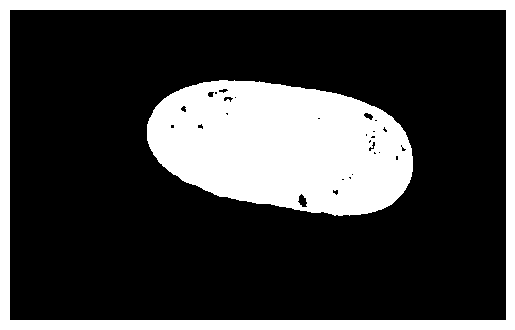

threshold_yen


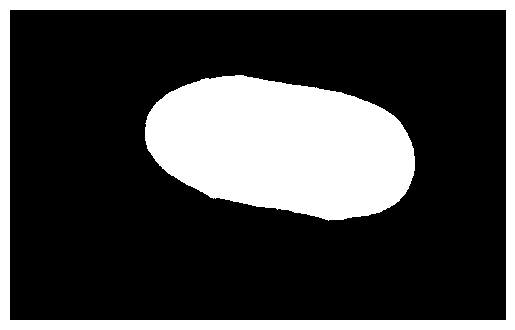

In [17]:
threshold_algorithms = [
    nsitk.threshold_huang,
    nsitk.threshold_intermodes,
    nsitk.threshold_isodata,
    nsitk.threshold_kittler_illingworth,
    nsitk.threshold_li,
    nsitk.threshold_maximum_entropy,
    nsitk.threshold_moments,
    nsitk.threshold_otsu,
    nsitk.threshold_renyi_entropy,
    nsitk.threshold_shanbhag,
    nsitk.threshold_triangle,
    nsitk.threshold_yen
]

for algorithm in threshold_algorithms:
    # show name of algorithm above the image
    print(algorithm.__name__)
    
    # binarize the image using the given algorithm
    binary_image = algorithm(img_median)
    
    # show the segmentation result
    stackview.imshow(binary_image)